# Homework 2: Table Manipulation, Visualization, Functions

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

Deadline:

This assignment is due on January 27 (Friday), 2023 at 23:59

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. 

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *


# These lines do some fancy plotting magic.",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Differences between Universities

**Question 1.** Suppose you're choosing a university to attend, and you'd like to *quantify* how *dissimilar* any two universities are.  You rate each university you're considering on several numerical traits.  You decide on a very detailed list of 1000 traits, and you measure all of them!  Some examples:

* The cost to attend (per year).
* The average Yelp review of nearby Thai restaurants.
* The USA Today ranking of the Medical school.
* The USA Today ranking of the Engineering school.

You decide that the dissimilarity between two universities is the *total* of the differences in their traits.  That is, the dissimilarity is:

* the **sum** of
* the absolute values of
* the 1000 differences in their trait values.

In the next cell, we've loaded arrays containing the 1000 trait values for University A and University B.  Compute the dissimilarity (according to the above technique) between University A and University B.  Call your answer `dissimilarity`.  Use a single line of code to compute the answer.

In [6]:
A = Table.read_table("A.csv").column("Trait value")
B = Table.read_table("B.csv").column("Trait value")

dissimilarity = sum(abs(A-B))
dissimilarity

14060.558701067919

##### Weighing the traits
After computing dissimilarities between several schools, you notice a problem with your method: the scale of the traits matters a lot.

Since schools cost tens of thousands of dollars to attend, the cost-to-attend trait is always a much bigger *number* than most other traits.  That makes it affect the dissimilarity a lot more than other traits.  Two schools that differ in cost-to-attend by $\$900$, but are otherwise identical, get a dissimilarity of $900$.  But two schools that differ in graduation rate by $0.9$ (a huge difference!), but are otherwise identical, get a dissimilarity of only $0.9$.

One way to fix this problem is to assign different "weights" to different traits. For example, we could fix the problem above by multiplying the difference in the cost-to-attend traits by $.001$, so that a difference of $\$900$ in the attendance cost results in a dissimilarity of $\$900 \times .001$, or $0.9$.

Here's a revised method that does that for every trait:

1. For each trait, subtract the two schools' trait values.
2. Then take the absolute value of that difference.
3. Now multiply that absolute value by a trait-specific number, like $.001$ or $2$.
4. Now, sum the 1000 resulting numbers.

**Question 2.** Suppose you've already decided on a weight for each trait.  These are loaded into an array called `weights` in the cell below.  `weights.item(0)` is the weight for the first trait, `weights.item(1)` is the weight for the second trait, and so on.  Use the revised method to compute a revised dissimilarity between University A and University B.

*Hint:* Using array arithmetic, your answer should be almost as short as in question 1.

In [7]:
weights = Table.read_table("weights.csv").column("Weight")

revised_dissimilarity = sum(abs(A-B)*weights)
revised_dissimilarity

505.98313211458793

## 2. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file located in the same directory as this notebook called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [9]:
unemployment = Table().read_table("unemployment.csv")
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


**Question 2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

In [18]:
by_nei = unemployment.sort("NEI", descending=True)
by_nei_pter = unemployment.sort("NEI-PTER", descending=True)
by_nei.show(5)
by_nei_pter.show(5)

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664


Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2009-07-01,10.8089,12.7404
2010-01-01,10.9054,12.7311
2010-04-01,10.6597,12.5664
2009-04-01,10.7082,12.5497


**Question 3.** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [19]:
greatest_nei = by_nei.take(np.arange(0, 10, 1))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [20]:
pter = unemployment.column("NEI-PTER") - unemployment.column("NEI")
pter

array([ 1.0746,  1.1644,  1.1555,  1.129 ,  1.2139,  1.0757,  1.1282,
        1.1114,  1.0529,  1.0744,  1.1004,  1.0747,  1.0705,  1.0455,
        1.008 ,  0.9734,  0.9753,  0.8931,  0.9451,  0.8367,  0.8208,
        0.8105,  0.8248,  0.7578,  0.7251,  0.7445,  0.7543,  0.7423,
        0.7399,  0.7687,  0.8418,  0.9923,  0.9181,  0.9629,  0.9703,
        0.9575,  1.0333,  1.0781,  1.0675,  1.0354,  1.0601,  1.01  ,
        1.0042,  1.0368,  0.9704,  0.923 ,  0.9759,  0.93  ,  0.889 ,
        0.821 ,  0.9409,  0.955 ,  0.898 ,  0.8948,  0.9523,  0.9579,
        1.0149,  1.0762,  1.2873,  1.4335,  1.7446,  1.8415,  1.9315,
        1.8859,  1.8257,  1.9067,  1.8376,  1.8473,  1.7993,  1.8061,
        1.7651,  1.7927,  1.7286,  1.6387,  1.6808,  1.6805,  1.6629,
        1.6253,  1.6477,  1.6298,  1.4796,  1.5131,  1.4866,  1.4345,
        1.3675,  1.3097,  1.2319,  1.1735,  1.1844,  1.1746])

**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [21]:
by_pter = unemployment.with_column("PTER", pter).sort("PTER", descending=True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


**Question 6.** Create a line plot of the PTER over time. To do this, first add the `year` array and the `pter` array to the `unemployment` table; label these columns "Year" and "PTER", respectively. Assign this new table to `pter_over_time`. 

Then, generate a line plot using one of the table methods you've learned in class.

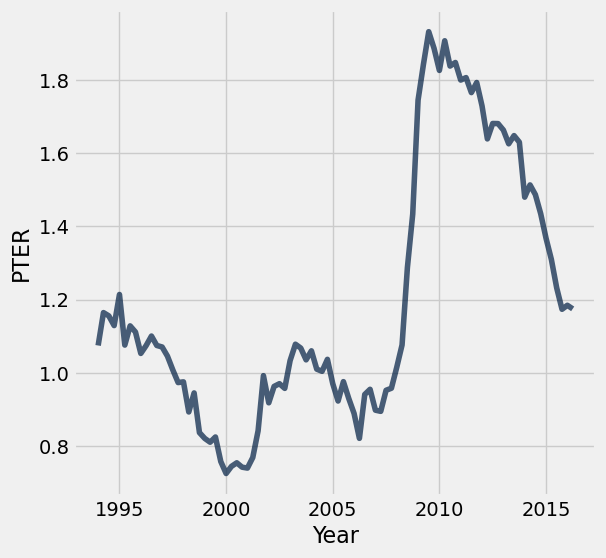

In [24]:
year = 1994 + np.arange(by_pter.num_rows)/4
pter_over_time = unemployment.with_columns("Year", year, "PTER", pter)
pter_over_time.plot("Year", "PTER")

## 3. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv).

If you want to read more about the different column descriptions, go [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf).

In [25]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled('POPESTIMATE2015', '2015').relabeled('POPESTIMATE2016', '2016')
pop = pop.relabeled('BIRTHS2016', 'BIRTHS').relabeled('DEATHS2016', 'DEATHS')
pop = pop.relabeled('NETMIG2016', 'MIGRATION').relabeled('RESIDUAL2016', 'OTHER')
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(50)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"
4,Colorado,"5,448,819","5,540,545","67,453","37,121","60,773",621
1,Connecticut,"3,584,730","3,576,452","35,848","30,638","-12,822",-666
3,Delaware,"944,076","952,065","10,922","8,945","5,583",429
3,District of Columbia,"670,377","681,170","9,779","5,455","6,392",77
3,Florida,"20,244,914","20,612,439","222,793","201,485","325,986","20,231"


**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** What year corresponds to the start of the time period?

In [27]:
us_birth_rate = sum(pop.column("BIRTHS"))/sum(pop.column("2015"))
us_birth_rate

0.012358536498646102

**Question 2.** Assign `fastest_growth` to an array of the names of the five states with the fastest population growth rates in *descending order of growth rate*. We have first created a new version of the `pop` table, called `growth_rates`, which includes a column with the growth rate of each state. Making intermediate tables can improve the readability of the code and make it easier to follow when revisting at a later time. You can check the intermediate table by using tbl.show(5).

In [31]:
growth_rates = pop.with_column('Growth Rate', (pop.column(3) / pop.column(2)) - 1)
fastest_growth = growth_rates.sort("Growth Rate", descending=True).column("NAME").take(np.arange(0,5,1))
fastest_growth

array(['Utah', 'Nevada', 'Idaho', 'Florida', 'Washington'],
      dtype='<U20')

**Question 3.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. 

The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. 

The `MIGRATION` column contains estimated annual net migration counts by state.

In [39]:
migration_rates = abs(pop.column("MIGRATION")/pop.column("2015"))
movers = sum(migration_rates > 0.01)
movers

9

**Question 4.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). 

**Hint:** Make sure you double check the type of the values in the region column.

In [44]:
print(type(pop.column("REGION")[0]))
west_births = sum(pop.where("REGION", "4").column("BIRTHS"))
west_births

<class 'numpy.str_'>


979657

**Question 5.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *total number of births in region 4 (the Western US)* during this time interval.

In [46]:
less_than_west_births = sum(pop.column("2016") < west_births)
less_than_west_births

7

**Question 6.** 

In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here.

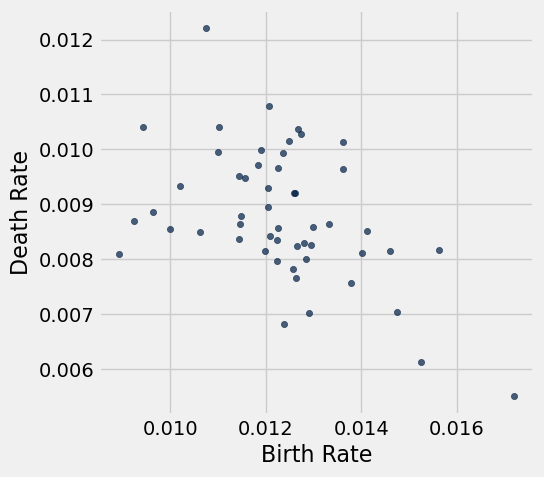

In [49]:
# Generate your chart in this cell
birth_rates = pop.column('BIRTHS') / pop.column('2015')
death_rates = pop.column('DEATHS') / pop.column('2015')
pop_rates = Table().with_columns('Birth Rate', birth_rates, 'Death Rate', death_rates)
pop_rates.scatter('Birth Rate', 'Death Rate')


## 4. Marginal Histograms


Consider the following scatter plot: ![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

**Question 1:** Match each of the following histograms to the code that produced them. Explain your reasoning.

**Histogram A:** ![](var1.png)

**Histogram B:** ![](var2.png)

**Line 1:** `t.hist('x')`

**Histogram for Line 1:**

**Explanation:**

**Line 2:** `t.hist('y')`

**Histogram for Line 2:**

**Explanation:**

## 5. Working with Text using Functions


The following table contains the words from four chapters of Charles Dickens' [*A Tale of Two Cities*](http://www.gutenberg.org/cache/epub/98/pg98.txt).  We're going to compute some simple facts about each chapter.  Since we're performing the same computation on each chapter, it's best to encapsulate each computational procedure in a function, and then call the function several times. Run the cell to get a table with one column.

In [50]:
# Just run this cell to load the data.
tale_chapters = Table.read_table("tale.csv")
tale_chapters

Chapter text
"I. The Period It was the best of times, it was the wor ..."
"II. The Mail It was the Dover road that lay, on a Frid ..."
III. The Night Shadows A wonderful fact to reflect upo ...
IV. The Preparation When the mail got successfully to ...


**Question 1.** Write a function called `word_count` that takes a single argument, the text of a single chapter, and returns the number of words in that chapter.  Assume that words are separated from each other by spaces. 

*Hint:* Try the string method [`split`](https://docs.python.org/3/library/stdtypes.html#str.split) and the function [`len`](https://docs.python.org/3/library/functions.html#len).

In [57]:
def word_count(text):
    return len(text.split(" "))

word_count(tale_chapters.column("Chapter text").item(0))

911

**Question 2.** Create an array called `chapter_lengths` which contains the length of each chapter in `tale_chapters`.

**Hint:** Consider using `apply` along with the function you have defined in the previous question.

In [58]:
chapter_lengths = tale_chapters.apply(word_count, "Chapter text")
chapter_lengths

array([ 911, 1827, 1468, 3994])

**Question 3.** Write a function called `character_count`.  It should take a string as its argument and return the number of characters in that string that aren't spaces (" "), periods ("."), exclamation marks ("!"), or question marks ("?"). 

*Hint:* Try using the string method `replace` several times to remove the characters we don't want to count.

In [60]:
def character_count(string):
    return len(string.replace(" ", "").replace(".", "").replace("!", "").replace("?", ""))

**Question 4.** Write a function called `chapter_number`.  It should take a single argument, the text of a chapter from our dataset, and return the number of that chapter, as a Roman numeral.  (For example, it should return the string "I" for the first chapter and "II" for the second.)  If the argument doesn't have a chapter number in the same place as the chapters in our dataset, `chapter_number` can return whatever you like.

To help you with this, we've included a function called `text_before`.  Its documentation describes what it does.

*Note*: This process of using a function to call another function to reduce the total number of arguments is called "currying". Notice how `text_before` takes two arguments, but your `chapter_number` function only takes one argument.

In [61]:
def text_before(full_text, pattern):
    """Finds all the text that occurs in full_text before the specified pattern.

    Parameters
    ----------
    full_text : str
        The text we want to search within.
    pattern : str
        The thing we want to search for.

    Returns
    -------
    str
        All the text that occurs in full_text before pattern.  If pattern
        doesn't appear anywhere, all of full_text is returned.
    
    Examples
    --------
    
    >>> text_before("The rain in Spain falls mainly on the plain.", "Spain")
    'The rain in '
    >>> text_before("The rain in Spain falls mainly on the plain.", "ain")
    'The r'
    >>> text_before("The rain in Spain falls mainly on the plain.", "Portugal")
    'The rain in Spain falls mainly on the plain.'
    """
    return np.array(full_text.split(pattern)).item(0)

In [64]:
def chapter_number(chapter_text):
    return text_before(chapter_text, '.').strip()

'III'

## 6. Uber


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` table contains the length of the ride, in minutes.

In [65]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

Boston Table


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila Table


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


**Question 1.**
Produce histograms of all ride times in Boston and in Manila, using the given bins. Please put the code for both of them in the following cell, and put the ride times for Boston first. Make sure they use the same bins and that you are using density on the y-axis.

*Bonus*: Practice using matplotlib to make these graphs!

(array([ 0.00593476,  0.01453211,  0.02239653,  0.02527931,  0.02449949,
         0.02185627,  0.01862181,  0.01527931,  0.01267788,  0.00997044,
         0.00756065,  0.00578084,  0.00410601,  0.00295515,  0.00219368,
         0.00159429,  0.00115902,  0.00097554,  0.00077778,  0.00062181,
         0.00046993,  0.00039857,  0.00035882]),
 array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
          45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
          90.,   95.,  100.,  105.,  110.,  115.]),
 <BarContainer object of 23 artists>)

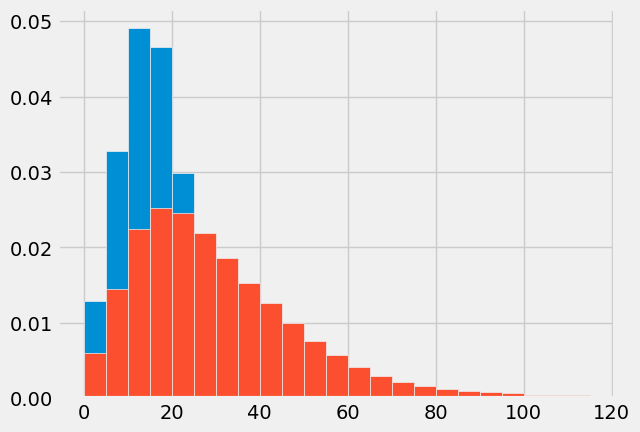

In [68]:
bins = np.arange(0, 120, 5)
plots.hist(boston.column("ride time"), bins=bins, density=True)
plots.hist(manila.column("ride time"), bins=bins, density=True)

**Question 2.** Set the two variables below to estimates of what percentage of rides are less than 10 minutes in Boston and Manila. Find your estimates by visually assessing the histograms. 

Show your work - your solution should consist of only mathematical operations and numbers.

In [70]:
boston_under_10 = np.mean(boston.column("ride time") < 10)
manila_under_10 = np.mean(manila.column("ride time") < 10)
boston_under_10, manila_under_10

(0.22828999999999999, 0.10038999999999999)

**Question 3.** Comment on the main difference between the two histograms. What might be causing this?

*Type your answer here, replacing this text.*

**Question 4.** The `hod` column in each table represents the hour of the day during which the Uber was called. 0 corresponds to 12-1 AM, 1 to 1-2 AM, 13 to 1-2 PM, etc. 

Write a function which takes in a table like `boston` or `manila`, and an `hod` number between 0 and 23, and displays a histogram of ride lengths from that hour in that city. Use the same bins as before and assume that the table passed into the `tbl` argument has the same columns as `boston` or `manila`.

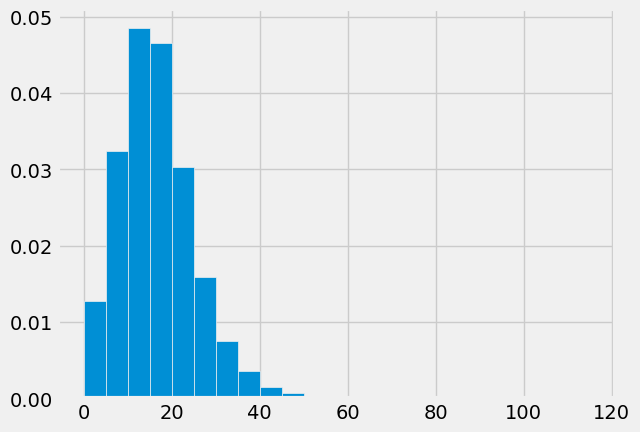

In [73]:
def hist_for_time(tbl, hod):
    bins = np.arange(0, 120, 5)
    plots.hist(tbl.where("hod").column("ride time"), bins=bins, density=True)

#DO NOT DELETE THIS LINE! 
hist_for_time(boston, 12)

**Question 5.** Which city has a larger difference between Uber ride times at 10 AM vs. 10 PM? In other words, which is larger: the difference between 10 AM and 10 PM Uber ride times in Manila or the difference between 10 AM and 10 PM uber ride times in Boston. Use the function you just created to answer this question. You do not need to calculate an actual difference.

Assign `larger_diff` to the number 1 if the answer is Manila, and 2 if the answer is Boston. 

In [ ]:
larger_diff = 2

## 7. Submission


To submit your assignment, please download your notebook as a .ipynb file and submit to Canvas. You can do so by navigating to the toolbar at the top of this page, clicking File > Download as... > Notebook (.ipynb) or HTML (.html). Then, upload your files under "Assignment 2" on Canvas.